<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/ViktorB9898-Lab6/Lab6/ViktorB9898_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Optimization and Learning**
**Viktor Beck**

# **Abstract**

This report features an implementation of the Gradient descent method.

#**About the code**

In [1]:
"""This program is a lab report in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2023 Viktor Beck (vbeck@kth.se / viktor.beck98@gmail.com)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell.

In [2]:
# Load neccessary modules.
from google.colab import files

#import time
import numpy as np
#from scipy.optimize import line_search
#import numdifftools as nd
#from scipy.misc import derivative
#import random

from matplotlib import pyplot as plt

# **Introduction**

This report is about the Gradient Descent method which is widely used in Machine Learning. It is fast and easy to understand because it is a linear model. This means that it can be useful for learning on very big (but not too complex) datasets if the executon time is important. It can be used in both regression and classification tasks or in general for minimization problems.

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/17068)

# **Method**

### **1. Function: Gradient descent method in Rn**

Gradient descent is an iterative method for minimizing a cost function. In each iteration the x is shifted into the opposite direction of the gradient which will ultimately lead to the minimizing point, given that the learning rate $\alpha$ is small enough and the initial guess is not close to a local minimum. $\alpha$ can be computed in each iteration by "line_search" which will lead to faster convergence but it can also be chosen constant and adapted by a certain condition that is checked in each iteration: If $f(x_{new}) > f(x)$ then make $\alpha$ smaller. Here we can see $f()$ as the cost function that we want to mimnimize. Mathematically speaking:
\begin{equation}
x_{k+1}=x_k-\alpha * \nabla f(x_k).
\end{equation}

In [3]:
 #central difference for calculating the gradient
def gradient(f, x):
    dx = 1e-6
    Df = (f(x+dx) - f(x-dx)) / (2*dx)
    return Df

# constant learning rate (easier than line_search)
def gradient_descent(f, x0, tol=1e-8, alpha=0.1, exact=[0,0]):
    x = x0
    Df = 1

    # for plotting
    err = []

    while np.linalg.norm(Df) > tol:
        Df = gradient(f, x)
        x_new = x - alpha * Df
        if f(x_new) > f(x):
            print("Adapting alpha")
            alpha = alpha * 0.5 #adapt alpha if f(x) gets bigger 
        x = x_new
        #print(Df)

        # for plotting
        err.append(np.linalg.norm(exact-x))

    return x, err

# **Results**

### **1. Function: Gradient descent method in Rn**

In [4]:
def f1(x):
    return x[1]**2 + (x[0])**2 

f1_res = np.array([0,0])

def f2(x):
    return (x+1)**2

f2_res = -1

res1 = gradient_descent(f1, np.array([1,1]), exact=f1_res)
res2 = gradient_descent(f2, np.array([1]), exact=f2_res)

print("f1: x* =", res1[0])
print("f1 error:", np.linalg.norm(res1[0]-f1_res), "\n")
print("f2: x* =", res2[0])
print("f2 error:", np.linalg.norm(res2[0]-f2_res))

f1: x* = [1.33674945e-09 1.33674945e-09]
f1 error: 1.8904492071613707e-09 

f2: x* = [-1.]
f2 error: 3.794275227342325e-09


We can see exponential convergence for functions f1 and f2:

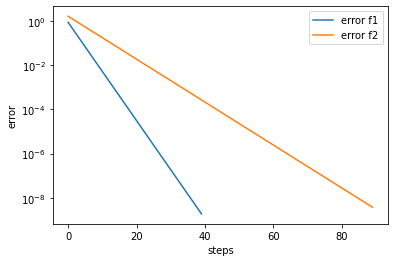

In [5]:
plt.semilogy(range(len(res1[1])),res1[1], label="error f1")
plt.semilogy(range(len(res2[1])),res2[1], label="error f2")
plt.xlabel("steps")
plt.ylabel("error")
plt.legend()

To show how the adaptive learning rate works:

In [6]:
# choose alpha=10 which is way too large
print("f1:")
res1 = gradient_descent(f1, np.array([1,1]), alpha=10)
print("\nf2:")
res2 = gradient_descent(f2, np.array([1]), alpha=10)

print("\nf1: x* =", res1[0])
print("f1 error:", np.linalg.norm(res1[0]-f1_res), "\n")
print("f2: x* =", res2[0])
print("f2 error:", np.linalg.norm(res2[0]-f2_res))

f1:
Adapting alpha
Adapting alpha
Adapting alpha
Adapting alpha
Adapting alpha

f2:
Adapting alpha
Adapting alpha
Adapting alpha
Adapting alpha

f1: x* = [5.68636904e-10 5.68636904e-10]
f1 error: 8.041740216399777e-10 

f2: x* = [-1.]
f2 error: 4.665705599649073e-10


# **Discussion**

One can see that the gradient descent method works quite well. A weakness of this method is that it can't distinguish between a local and a global minimum. So if the learning rate is chosen too small it could "fall" into a local minimum and if it is too big it could miss the minimum and never converge. A counteract to this is to choose the alpha adaptively or with line_search in each iteration but even then we do not have a guarantee that it will find the right minimum.